### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Robotics as Robotics
import Utils
import modern_robotics as mr
import scipy
import pandas as pd

In [2]:
np.set_printoptions(suppress=True)

### Create the Robotics Object to access functions

In [3]:
robotics = Robotics.Robotics()

In [4]:
near_Zero     = lambda matrix : np.where(np.abs(matrix) < 1e-06, 0, matrix)
near_Zero_Val = lambda value : 0.0 if np.abs(value) < 1e-06 else value

## Trajectory Generation

### Reference Trajectory Function

In [5]:
def reference_Trajectory(initial_configuration, final_configuration, time, time_step, trajectory_type, time_scaling):
    """Function to generate reference trajectory or desired trajectory. ===> Type : Free Function.
       Parameters:
       ===========
                  initial_configuration : The Initial SE(3) Configuration; ===> Type : Numpy Matrix; Shape : (4, 4).
                  final_configuration   : The Final SE(3) Configuration;   ===> Type : Numpy Matrix; Shape : (4, 4).
                  time                  : The Total Time of Trajectory in seconds;   ===> Type : Float.
                  time_step             : The Time Step (dt) in seconds;             ===> Type : Float.
                  trajectory_type       : Screw ('S') or Cartesian ('C') Trajectory; ===> Type : String.
                  time_scaling          : Cubic ('C') or Quintic ('Q') time scaling; ===> Type : String.
       Return:
       ===========
                  trajectory : The Desired Trajectory; ===> Type : Numpy Tensor; Shape : (n_points, 4, 4).
    """
    
    ### Check Inputs
    assert initial_configuration.shape == (4, 4),            "Shape of Initial Configuration Matrix should be (4, 4)."
    assert np.isnan(initial_configuration).any() == False,   "There is a NaN value in Initial Configuration Matrix."
    assert final_configuration.shape   == (4, 4),            "Shape of Final Configuration Matrix should be (4, 4)."
    assert np.isnan(final_configuration).any() == False,     "There is a NaN value in Final Configuration Matrix."
    assert trajectory_type == 'S' or trajectory_type == 'C', "Trajectory Type should be 'S' or 'C'."
    assert time_scaling == 'C' or time_scaling == 'Q',       "Time Scaling should be 'C' or 'Q'."
    
    ### Select Trajectory Function : Screw or Cartesian
    if trajectory_type == 'S':
        trajectory_function = robotics.screw_Trajectory

    elif trajectory_type == 'C':
        trajectory_function = robotics.cartesian_Trajectory
        
    ### Calculate Number of Points in the trajectory
    n_points = int((time/time_step))
    
    ### Generate the Trajectory
    trajectory = trajectory_function(initial_configuration, final_configuration, time, n_points, time_scaling)
        
    return trajectory

### Helper Function to Duplicate SE3 during Grasping

In [6]:
def duplicate_Trajectory(configuration, n_points):
    """Duplicates the Configuration n times. ===> Type : Free Function.
       Parameters:
       ===========
                  configuration : The SE(3) Configuration; ===> Type : Numpy Matrix; Shape : (4, 4).
                  n_points      : The number of points;    ===> Type : Int.
       Return:
       ===========
                  trajectory : The Trajectory during grasping; ===> Type : Numpy Tensor; Shape : (n_points, 4, 4).
    """
    ### Check Inputs
    assert configuration.shape == (4, 4) ,         "Shape of Configuration Matrix should be (4, 4)."
    assert np.isnan(configuration).any() == False, "There is a NaN value in Configuration Matrix."
    
    ### Create trajectory tensor of shape (n_points, 4, 4)
    trajectory = np.empty((n_points, 4, 4)) * np.nan
    
    ### Assign configuration to all the matrices in the trajectory
    trajectory[:, :, :] = configuration
    
    ### Check if there is no nan values and return
    if np.isnan(trajectory).any() == False:
        return trajectory
    else:
        raise Utils.ThereIsNan

#### Initialize Configuration Points

In [7]:
TSB = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0.0963], [0, 0, 0, 1]])

In [8]:
R_Y = np.array([[np.cos(3*(np.pi/4)), 0, np.sin(3*(np.pi/4))], [0, 1, 0],[-np.sin(3*np.pi/4), 0, np.cos(3*np.pi/4)]])
R_Z = np.array([[np.cos(-np.pi/2), -np.sin(-np.pi/2), 0], [np.sin(-np.pi/2), np.cos(-np.pi/2), 0], 
                [0, 0, 1]])
R_4 = np.dot(R_Z, R_Y)

In [71]:
TSE_1 = np.array([[1, 0, 0, 0.1992], [0, 1, 0, 0], [0, 0, 1, 0.7535], [0, 0, 0, 1]])
# TSE_2 = np.array([[-1, 0, 0, 1], [0, 1, 0, 0],  [0, 0, -1, 0.075], [0, 0, 0, 1]])
TSE_2 = np.array([[np.cos(3*(np.pi/4)), 0, np.sin(3*(np.pi/4)), 1], [0, 1, 0, 0],
                   [-np.sin(3*np.pi/4), 0, np.cos(3*np.pi/4), 0.075], [0, 0, 0, 1]])
# TSE_3 = np.array([[-1, 0, 0, 1], [0, 1, 0, 0],  [0, 0, -1, 0.025], [0, 0, 0, 1]])
TSE_3 = np.array([[np.cos(3*(np.pi/4)), 0, np.sin(3*(np.pi/4)), 1], [0, 1, 0, 0],  
                  [-np.sin(3*np.pi/4), 0, np.cos(3*np.pi/4), 0.025], [0, 0, 0, 1]])
TSE_4 = np.array([[0, +1, 0, 0], [1, 0, 0, -1], [0, 0, -1, 0.075], [0, 0, 0, 1]])
TSE_4[0:-1, 0:-1] = R_4
TSE_5 = np.array([[0, 1, 0, 0],  [1, 0, 0, -1], [0, 0, -1, 0.01],  [0, 0, 0, 1]])
TSE_5[0:-1, 0:-1] = R_4

In [72]:
traj_type  = 'S'
time_scale = 'C'

#### Trajectory 1

In [73]:
trajectory_1 = reference_Trajectory(TSE_1, TSE_2, 5, 0.01, traj_type, time_scale)

#### Trajectory_2

In [74]:
trajectory_2 = reference_Trajectory(TSE_2, TSE_3, 2, 0.01, traj_type, time_scale)

#### Trajectory 3

In [75]:
trajectory_3 = duplicate_Trajectory(TSE_3, 63)

#### Trajectory 4

In [76]:
trajectory_4 = reference_Trajectory(TSE_3, TSE_2, 2, 0.01, traj_type, time_scale)

#### Trajectory 5

In [77]:
trajectory_5 = reference_Trajectory(TSE_2, TSE_4, 5, 0.01, traj_type, time_scale)

#### Trajectory 6

In [78]:
trajectory_6 = reference_Trajectory(TSE_4, TSE_5, 2, 0.01, traj_type, time_scale)

#### Trajectory 7

In [79]:
trajectory_7 = duplicate_Trajectory(TSE_5, 63)

#### Trajectory 8

In [80]:
trajectory_8 = reference_Trajectory(TSE_5, TSE_4, 2, 0.01, traj_type, time_scale)

#### Combine all Reference Trajectories

In [81]:
def combine_Trajectories(list_trajectory, list_gripper_act):
    """Function to combine reference trajectory and gripper actuation. ===> Type : Free Function.
       Parameters:
       ===========
                  list_trajectory  : The list of trajectory; ===> Type : List; Length : m; 
                                     -------- Data : Numpy Matrix; Shape : (n, 4, 4).
                  list_gripper_act : The list of gripper position @ particular trajectory as per trajectories 
                                     in the list_trajectory; ===> Type : List; Length : m; Data : Int.
       Return:
       ===========
                  reference_trajectory : A list of list containing SE(3) Configuration and gripper actuation; ===> Type : List; 
                                         -------- Data : List of Numpy Matrix(Shape : (4,4)) and Gripper Actuation(Int).                              
    """
    ### Create an empty list
    reference_trajectory = []  
    
    ### Loop through the list_trajectory and list_gripper_act
    for trajectory, gripper in zip(list_trajectory, list_gripper_act):
        for SE_3_matrix in trajectory:
            reference_trajectory.append([SE_3_matrix, gripper])

    ### Return
    return reference_trajectory

In [82]:
list_trajectory  = [trajectory_1, trajectory_2, trajectory_3, trajectory_4, trajectory_5, trajectory_6, trajectory_7, trajectory_8]
list_gripper_act = [0, 0, 1, 1, 1, 1, 0, 0]

### CombineTrajectory
reference_traj = combine_Trajectories(list_trajectory, list_gripper_act)

### Velocity Integrator

In [83]:
def integrator(c_velocity, p_angle, dt):
    """Function which integrates velocity to angle using first-order Euler. ===> Type : Free Function.
       Parameters:
       ===========
                  c_velocity : The current joint and wheel velocity in rad/s; ===> Type : Numpy Matrix; Shape : (n_joints + n_wheel, 1)
                  p_angle    : The previous joint and wheel angles in rad;    ===> Type : Numpy Matrix; Shape : (n_joints + n_wheel, 1)
                  dt         : The Time Step size; ===> Type : Float.
       Return:
       ===========
                  The current joint and wheel angles in rad; ===> Type : Numpy Array; Shape : (n_joints + n_wheel, 1).
    """
    ### Check Inuts
    assert p_angle.shape == c_velocity.shape,   "Shape of Velocity and Angle Matrix is not equal."
    assert np.isnan(c_velocity).any() == False, "There is a NaN value in Velocity Matrix."
    assert np.isnan(p_angle).any() == False,    "There is a NaN value in Angle Matrix."
    
    ### Return
    return p_angle + (c_velocity * dt) # First Order Euler Step

### Odometry

In [84]:
l_youbot = 0.235  # l value of Youbot; 2l = 0.47 m
w_youbot = 0.150  # w value of Youbot; 2w = 0.30 m
r_youbot = 0.0475 # r value of Youbot; r = 0.0475 m
l_w = 1/(l_youbot + w_youbot) # 1 / (l +w)
r_4 = r_youbot * 0.25         # r / 4

In [85]:
def odometry(delta_theta, p_config_q, p_head_phi):
    """Function which calculates chasis configuration using odometry. ===> Type : Free Function.
       Parameters:
       ===========
                  delta_theta : The change in wheel angles;  ===> Type : Numpy Matrix; Shape : (4, 1).
                  p_config_q  : The Previous Configuration;  ===> Type : Numpy Matrix; Shape : (3, 1).
                  p_head_phi  : The Previous Heading in rad; ===< Type : Float.
       Return:
       ===========
                  c_config_q : The Current Configuration; ===> Type : Numpy Matrix; Shape : (3, 1).
                  TBB_       : The SE(3) Congiguration between previous frame and current frame; ===> Type : Numpy Matrix; Shape : (4, 4).
    """
    ### Check Inputs
    assert delta_theta.shape == (4, 1), "Shape of delta_theta is not (4, 1)."
    assert p_config_q.shape == (3, 1),  "Shape of Velocity and Angle Matrix is not (3, 1)."
    
    ### Compute F Vector
    F  = r_4 * np.array([[-l_w, l_w, l_w, -l_w], [1, 1, 1, 1], [-1, 1, -1, 1]]) # Shape : (3, 4)
    
    ### Compute Planar Twist Vb
    Vb =  np.dot(F, delta_theta) # Shape : (3, 1)
    wbz, vbx, vby = Vb.ravel()   # Destructure the Array
    
    ### Create Saptial Twist Vb_6
    Vb_6 = np.array([[0], [0], [wbz], [vbx], [vby], [0]]) # Shape : (6, 1)
    
    ### Calculate TBB_
    Vb6_se3 = robotics.vector_To_SE3(Vb_6.ravel())             # Shape : (4, 4) in se(3)
    TBB_    = robotics.matrix_Exponential_Screw(Vb6_se3, 1.0)  # Shape : (4, 4) in SE(3)
    
    ### Calculate delta_qb
    if near_Zero_Val(wbz) == 0.0:
        delta_qb = np.array([[0], [vbx], [vby]]) # Shape : (3, 1)
    else:
        delta_qb = np.array([[wbz],
                            [(vbx*np.sin(wbz) + vby*(np.cos(wbz)-1))/wbz],
                            [(vby*np.sin(wbz) + vbx*(1-np.cos(wbz)))/wbz]]) # Shape : (3, 1)
    
    ### Calculate delta_q
    R = np.array([[1, 0, 0], 
                  [0, np.cos(p_head_phi), -np.sin(p_head_phi)], 
                  [0, np.sin(p_head_phi), np.cos(p_head_phi)]])  # Shape : (3, 3)
    delta_q = np.dot(R, delta_qb)                                # Shape : (3, 1)
    
    ### Calculate New Configuration
    c_config_q = p_config_q + delta_q  # Shape : (3, 1)
    
    ### Return 
    return c_config_q, TBB_

### Space Frame Transformer

#### Parameters for Forward Kinematics

In [86]:
M0E = np.array([[1, 0, 0, 0.033], [0, 1, 0, 0], [0, 0, 1, 0.6546], [0, 0, 0, 1]])  # M0E Matrix
TB0 = np.array([[1, 0, 0, 0.1662], [0, 1, 0, 0], [0, 0, 1, 0.0026], [0, 0, 0, 1]]) # TB0 Matrix
T0B = robotics.inverse_T_Matrix(TB0)

### Screw Axis
B1 = np.array([0, 0, 1, 0, 0.033, 0])
B2 = np.array([0, -1, 0, -0.5076, 0, 0])
B3 = np.array([0, -1, 0, -0.3526, 0, 0])
B4 = np.array([0, -1, 0, -0.2176, 0, 0])
B5 = np.array([0, 0, 1, 0, 0, 0])

### Screw List
screw_list = [B1, B2, B3, B4, B5]

### Screw List
S5 = np.array([0, 0, 1, 0, -0.033, 0])
S4 = np.array([0, -1, 0, 0.437, 0, -0.033])
S3 = np.array([0, -1, 0, 0.302, 0, -0.033])
S2 = np.array([0, -1, 0, 0.147, 0, -0.033])
S1 = np.array([0, 0, 1, 0, 0, 0])
screw_list_ = [S1, S2, S3, S4, S5]

In [87]:
def space_Frame_Transformer(TSB, TBB_, angles):
    """Function to obtain actual/updated configuration b/w space frame & end-effector frame. ===> Type : Free Function.
       Parameters:
       ===========
                  TSB    : The SE(3) b/w space and end-effector frame;    ===> Type : Numpy Matrix; Shape = (4, 4).
                  TBB_   : The SE(3) b/w previous and current body frame; ===> Type : Numpy Matrix; Shape = (4, 4).
                  angles : The wheel-joint angles from integrator;        ===> Type : Numpy Matrix; Shape = (9, 1).
       Return:
       ===========
                  TSE  : The updated configuration b/w space & end-effector frame; ===> Type : Numpy Matrix; Shape = (4, 4).
                  TSB_ : The updated configuration b/w space & chassis frame;      ===> Type : Numpy Matrix; Shape = (4, 4).
    """
    ### Check Inputs
    assert TSB.shape    == (4, 4), "Shape of TSB is not (4, 4)."
    assert TBB_.shape   == (4, 4), "Shape of TBB_ is not (4, 4)."
    assert angles.shape == (9, 1), "Shape of angles is not (9, 1)."
    
    ### Find updated SE(3) of space frame - body chasis frame
    TSB_ = np.dot(TSB, TBB_) # Shape : (4, 4)
    
    ### Find updated T0E due to chage in joint-angles using forward kinematics
    theta_list = [angles[4, 0], angles[5, 0], angles[6, 0], angles[7, 0], angles[8, 0]] # Extract Joint angles
    T0E        = robotics.forward_Kinematics_Body(screw_list, theta_list, M0E)          # Shape : (4, 4)
    
    ### Calculate updated configuration b/w space & end-effector frame
    TSE = np.dot(TSB_, np.dot(TB0, T0E))
  
    ### Return
    return TSE, TSB_

### Control

In [88]:
def control(TSE_desired, TSE_desired_next, TSE_actual, dt, X_int_error):
    """Function to obtain End Effector Twist ===> Type : Free Function.
       Parameters:
       ===========
                  TSE_desired : The desired SE(3) configuration; ===> Type : Numpy Matrix; Shape : (4, 4).
                  TSE_actual  : The actual SE(3) configuration;  ===> Type : Numpy Matrix; Shape : (4, 4).
                  TSE_desired_next : The desired SE(3) configuration in next time step; ===> Type : Numpy Matrix; Shape : (4, 4).
                  dt : The time step;                  ===> Type : Float.
                  X_int_error : The Integration Error; ===> Type : Numpy Matrix; Shape : (6, 1).
       Return:
       ===========
                  V : The End-Effector Twist;                            ===> Type : Numpy Matrix; Shape : (6, 1).
                  X_int_error : The Integration Error after 1 time step; ===> Type : Numpy Matrix; Shape : (6, 1).
    """
    ### Check Inputs
    assert TSE_desired.shape == (4, 4),      "Shape of TSE_desiered is not (4, 4)."
    assert TSE_desired_next.shape == (4, 4), "Shape of TSE_desired_next is not (4, 4)."
    assert TSE_actual.shape == (4, 4),       "Shape of TSE_actual is not (4, 4)."
    assert X_int_error.shape == (6, 1),      "Shape of X_int_error is not (6, 1)."
    assert dt != 0.0,                        "Time step cannot be zero."
    
    ### Finding Twist
    ###### 1. Find Xerror
    Xerror = robotics.matrix_Log_6(np.dot(robotics.inverse_T_Matrix(TSE_actual), TSE_desired)) # Shape : (4, 4)
    Xerror = robotics.SE3_To_Vector(Xerror) # se(3) to screw axis; Shape : (6)
    Xerror = np.expand_dims(Xerror, axis=1) # Shape : (6, 1)
    
    ###### 2. Find Twist that takes desired to desired_next
    Vd = (1/dt)*robotics.matrix_Log_6(np.dot(robotics.inverse_T_Matrix(TSE_desired), TSE_desired_next)) # Shape : (4, 4)
    Vd = robotics.SE3_To_Vector(Vd) # se(3) to screw axis; Shape : (6,)
    Vd = np.expand_dims(Vd, axis=1) # Shape : (6, 1)
    
    ###### 3. Find Adjoint of TSE_actual_inv and TSE_desired
    Ad = robotics.adjoint(np.dot(robotics.inverse_T_Matrix(TSE_actual), TSE_desired)) # Shape : (6, 6)
    
    ###### 4. Find the twist
    X_int_error = X_int_error + Xerror*dt                               # Shape : (6, 1)
    V = np.dot(Ad, Vd) + np.dot(Kp_, Xerror) + np.dot(Ki_, X_int_error) # Shape : (6, 1)
    
    return V, X_int_error, Xerror
    

#### Testing Control

In [89]:
Kp, Ki = 0.0, 0.0
Kp_ = np.eye(6) * Kp
Ki_ = np.eye(6) * Ki

In [90]:
TSE_desired      = np.array([[0, 0, 1, 0.5], [0, 1, 0, 0], [-1, 0, 0, 0.5], [0, 0, 0, 1]])
TSE_desired_next = np.array([[0, 0, 1, 0.6], [0, 1, 0, 0], [-1, 0, 0, 0.3], [0, 0, 0, 1]])
TSE_actual       = np.array([[0.17, 0, 0.985, 0.387], [0, 1, 0, 0], [-0.985, 0, 0.17, 0.57], [0, 0, 0, 1]])

In [91]:
V, _, _ = control(TSE_desired, TSE_desired_next, TSE_actual, 0.01, np.zeros((6,1)))

In [92]:
V

array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [21.4 ],
       [ 0.  ],
       [ 6.45]])

### Velocity of Youbot

In [187]:
max_joint_angles = np.array([2.932, 0.191, 1.914, 0.262, 2.890])
min_joint_angles = np.array([-2.932, -1.117, -1.4, -0.999, -2.890])

In [188]:
def test_Joint_Limits(joint_angles):
    """Tests Joint Angle to avoid singularities. ===> Free Function.
       Parameters:
       ===========
                  joint_angles : The joint angles of the manipulator;     ===> Type : List; Length : 5.
       Return:
       ===========
                  l_ind     : The indices of joint angles which violate joint limits;                ===> Type : List.
                  violation : Boolean Value telling if there is any joint which violates the limits; ===> Type : Bool.
    """
    ### Assert
    assert len(joint_angles) == 5, "The length of joint_angles is not 5."
    
    ### Create variables
    l_ind = []          # List to store indices of joint which violates joint limits
    violation = False   # Variable to indicate that there is violation in joint limits
    
    ### Loop through the joint_angles
    for i, angle in enumerate(joint_angles):
        if angle <= min_joint_angles[i] or angle >= max_joint_angles[i]: ## Check Limits
            l_ind.append(i)  # Append to List 
            violation = True # Make violation as true as there is violation in joint limits
    
    ### Return
    return l_ind, violation 

In [240]:
def velocity_Youbot(V, TSE_actual, joint_angles):
    """Obtains the Velocity of the Youbot by calculating the Jacobian. ===> Type : Free Function.
       Parameters:
       ===========
                  V            : The End-Effector Twist;                      ===> Type : Numpy Matrix; Shape : (6, 1).
                  TSE_actual   : The actual SE(3) configuration;              ===> Type : Numpy Matrix; Shape : (4, 4).
                  TSB          : The configuration b/w space and chasis body; ===> Type : Numpy Matrix; Shape : (4, 4).
                  joint_angles : The Joint Guess list (essentially the previous joint values); ===> Type : List; Length : 5.
       Return:
       ===========
                  The joint-wheel velocities of the youbot; ===> Type : Numpy Matrix; Shape : (9, 1).
    """
    ### Check Inputs
    assert V.shape == (6, 1),            "Shape of Twist is not (6, 1)."
    assert TSE_desired.shape == (4, 4),  "Shape of TSE_actual is not (4, 4)."
    assert TSB.shape == (4, 4),          "Shape of TSB is not (4, 4)."

    ###### Find Base Jacobian
    ### Compute T0E = T0B . TBS . TSE
    T0E = robotics.forward_Kinematics_Body(screw_list, joint_angles, M0E)
    
    ### Compute F6
    F6 = np.zeros((6, 4)) # Shape : (6, 4)
    F  = r_4 * np.array([[-l_w, l_w, l_w, -l_w], [1, 1, 1, 1], [-1, 1, -1, 1]]) # Shape : (3, 4)
    F6[2:5, :] = F
    
    ### Computer Jacobian of Chassis
    J_base = np.dot(robotics.adjoint(np.dot(robotics.inverse_T_Matrix(T0E), T0B)) , F6) # Shape : (6, 4)
    
    ###### Find Manuplator Jacobian
    ### Check for joint limits violation
    list_indices, violation = test_Joint_Limits(joint_angles)

    ### Find Jacobian using the obtained joint_angles
    J_manipulator = robotics.jacobian_Body(screw_list, joint_angles) # Shape : (6, 5)
    
    ### Change Manipulator Jacobian if there is violation
#     if violation:
#         for i in list_indices:
#             J_manipulator[:, i] = 0.0
            
    ### Overall Jacobian
    J = np.hstack((J_base, J_manipulator)) # Shape : (6, 9)

    ### Return
    return np.dot(np.linalg.pinv(J, rcond=1e-04), V)  # Shape : (6, 1)

In [241]:
x= velocity_Youbot(V, TSE_actual, [0, 0, 0.2, -1.6, 0])

In [242]:
reference_traj[0][0]

array([[1.    , 0.    , 0.    , 0.1992],
       [0.    , 1.    , 0.    , 0.    ],
       [0.    , 0.    , 1.    , 0.7535],
       [0.    , 0.    , 0.    , 1.    ]])

### Plot

In [243]:
def plot_Twist_Error(twist_error):
    log_wx = twist_error[:,0]
    log_wy = twist_error[:,1]
    log_wz = twist_error[:,2]
    log_vx = twist_error[:,3]
    log_vy = twist_error[:,4]
    log_vz = twist_error[:,5]
    
    plt.figure(figsize=(10, 7))
    plt.plot(log_wx, color = 'red', label='WX')
    plt.plot(log_wy, color = 'green', label='WY')
    plt.plot(log_wz, color = 'blue', label='WZ')
    plt.plot(log_vx, color = 'cyan', label='VX')
    plt.plot(log_vy, color = 'black', label='VY')
    plt.plot(log_vz, color = 'orange', label='WX')
    plt.legend()
    plt.grid(True)
    plt.show()

### Simulate

In [244]:
TSE_actual = TSE_1 = np.array([[1, 0, 0, 0.1992], [0, 1, 0, 0.1], [0, 0, 1, 0.7535], [0, 0, 0, 1]])
TSB = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0.0963], [0, 0, 0, 1]])

In [245]:
def simulate_Youbot(reference_trajectory, TSE_actual=None, TSB=None ):
    """Simulates the Youbot. ===> Type : Free Function.
       Parameters:
       ===========
                  reference_trajectory : A list containing list of SE(3) Configuration and Gripper Actuation; ===> Type : List.
                  TSE_actual  : The actual SE(3) configuration;              ===> Type : Numpy Matrix; Shape : (4, 4).
                  TSB         : The configuration b/w space and chasis body; ===> Type : Numpy Matrix; Shape : (4, 4).
       Return:
       ===========
                  A Matrix of configuration, wheel-joint angles and gripper actuation; ===> Type : Numpy Matrix; Shape : (N, 13).
                  The Twist Error; ===> Type : Numpy Matrix; Shape : (N, 6).
    """
    ### Create a numpy matrix to store the resulta
    data_matrix = np.zeros(shape=(len(reference_trajectory), 13)) # (N, 13)
    twist_error = np.zeros(shape=(len(reference_trajectory), 6)) # (N, 6)
    
    ### Time Step
    dt = 0.01
    
    ### Integration error 
    X_int_error = np.zeros((6, 1)) # Shape : (6, 1)
    
    ### Joint angles
    joint_angles = [0.0, 0.0, 0.0, 0.0, 0.0] # List of length 5
    
    ### Angles of joint and wheels in starting position
    p_angle = np.zeros((9, 1)) # Shape : (9,1)
    
    ### Configuration of the chassis @ starting position and chassis angle
    p_config_q = np.zeros((3, 1)) # Shape : (3, 1)
    p_head_phi = 0.0              # Float
    
    ### TSE Actual Calculation
    T0E = robotics.forward_Kinematics_Body(screw_list, [0, 0, 0, 0, 0], M0E)
    TSE_actual = np.dot(TSB, np.dot(TB0, T0E))
    
    # Loop till the n-1 the element of the reference_trajectory due to TSE_desired_next
    for index, SE_3_config_gripper in enumerate(reference_trajectory[:-1]):  
        
        ### Obtain the desired configuration and TSE_desired_next
        TSE_desired, gripper_act = SE_3_config_gripper         # Destructure the List
        TSE_desired_next = reference_trajectory[index + 1][0]  # Extract TSE_desired_next

        ### Call Control Function to obtain Twist and next time step integration error
        V, X_int_error_, Xerror = control(TSE_desired, TSE_desired_next, TSE_actual, dt, X_int_error) # Shape : (6, 1)
        twist_error[index+1, :] = Xerror.ravel() # Shape : (6,)
        
        ### Get velocity of the youbot and clip the velocities
        velocities = velocity_Youbot(V, TSE_actual, joint_angles) # Shape : (9, 1)
        
        ### Clip velocities to a certain range
        velocities = np.clip(velocities, a_min=-5, a_max=5) # Shape : (9, 1) 
        
        ### Pass velocities to the integrator
        angles = integrator(velocities, p_angle, dt)       # Shape : (9, 1)
        
        ### Update the Youbot configuration using odometry
        delta_theta      = np.expand_dims(angles[0:4, 0] - p_angle[0:4, 0], axis=1) # Shape : (4, 1)
        c_config_q, TBB_ = odometry(delta_theta, p_config_q, p_head_phi)            # Shape : (3, 1) & (4, 4) 
        
        ### Get change in Space-End Effector Configuration due to Movement
        joint_angles = list(angles[4:, 0]) 
        T0E = robotics.forward_Kinematics_Body(screw_list, joint_angles, M0E)
        TSB = np.array([[np.cos(c_config_q[0, 0]), -np.sin(c_config_q[0, 0]), 0, c_config_q[1, 0]],
                        [np.sin(c_config_q[0, 0]), +np.cos(c_config_q[0, 0]), 0, c_config_q[2, 0]],
                        [0, 0, 1, 0.0963],
                        [0, 0, 0, 1]])
        TSE_actual = np.dot(TSB, np.dot(TB0, T0E))
        
        ### Update values to the data frame array
        data_matrix[index+1, 0:3]  = c_config_q[:, 0] # Configuration of chassis
        data_matrix[index+1, 3:8]  = angles[4:, 0]    # Manipulator angles
        data_matrix[index+1, 8:12] = angles[0:4, 0]   # Wheel angles
        data_matrix[index+1, 12]   = gripper_act      # Gripper Actuation
        
        ### Update Values for next iteration
        X_int_error  = X_int_error_        # Update integration error; Shape : (6, 1)
        p_angle      = angles              # Update wheel-joint angles; Shape : (9, 1)
        p_config_q   = c_config_q          # Update Chassis configuration; Shape : (3, 1)
        p_head_phi   = c_config_q[0, 0]    # Update Chassis heading; Type : Float
        
        
    ### Return
    return near_Zero(data_matrix), twist_error

In [246]:
TSE_actual = np.array([[1, 0, 0, 0.1992], [0, 1, 0, 0.0], [0, 0, 1, 0.7535], [0, 0, 0, 1]])
TSB = np.array([[1, 0, 0, 0], [0, 1, 0, 0.0], [0, 0, 1, 0.0963], [0, 0, 0, 1]])

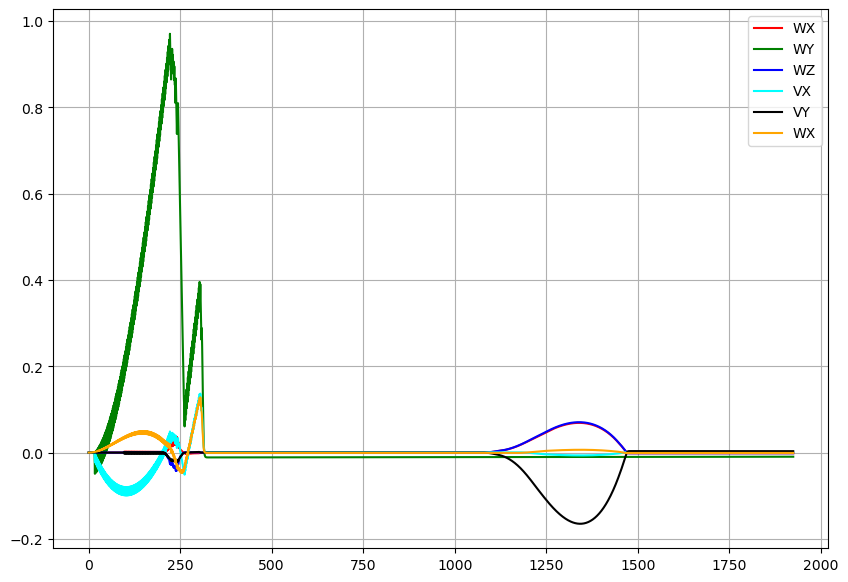

In [248]:
Kp, Ki = 50, 0.5
Kp_ = np.eye(6) * Kp
Ki_ = np.eye(6) * Ki
x, twist_error = simulate_Youbot(reference_traj, TSE_actual, TSB)
plot_Twist_Error(twist_error)

In [249]:
d = pd.DataFrame(x)
d.to_csv('d_0.csv', header=None, index=False)